# K Means cluster algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop('CustomerID', axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
# rename the features
df = df.rename(columns={'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'})

In [9]:
# descriptive statistics
df.describe()

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
# datas features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Genre   200 non-null    object
 1   Age     200 non-null    int64 
 2   income  200 non-null    int64 
 3   score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [11]:
df.Age.std() # standard deviation

13.969007331558883

# Data vizualize

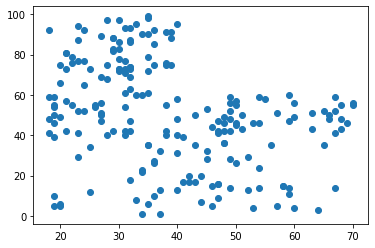

In [12]:
plt.scatter(df.Age, df.score)

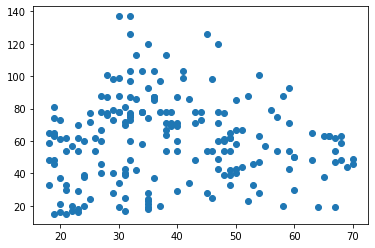

In [13]:
plt.scatter(df.Age, df.income)

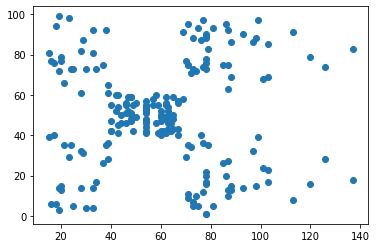

In [14]:
plt.scatter(df.income, df.score)

# Pair plot

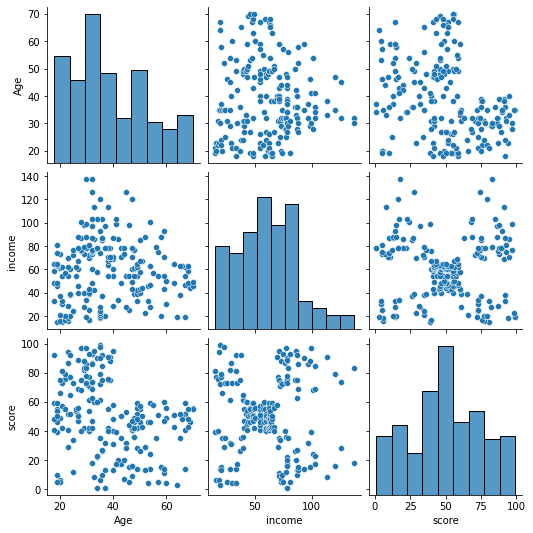

In [17]:
sns.pairplot(df[['Age', 'income', 'score']])

# K Means

In [18]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans()

In [19]:
kmeans.fit(df[['income', 'score']])

KMeans()

In [20]:
pred = kmeans.predict(df[['income', 'score']])

In [21]:
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 7, 4, 7, 7,
       3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5])

In [22]:
df['cluster_num'] = pred
df.head()

,Genre,Age,income,score,cluster_num
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [23]:
centroids = kmeans.cluster_centers_

In [24]:
centroids

array([[ 79.73913043,  13.39130435],
       [ 63.80952381,  47.66666667],
       [ 78.55172414,  82.17241379],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [109.7       ,  82.        ],
       [109.7       ,  22.        ],
       [ 47.06818182,  50.36363636]])

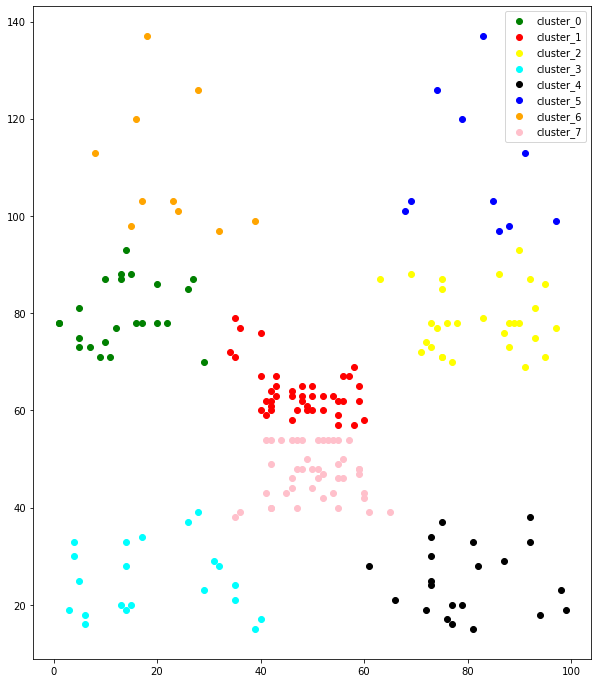

In [31]:
# Data vizualisation
cl0 = df[df.cluster_num == 0]
cl1 = df[df.cluster_num == 1]
cl2 = df[df.cluster_num == 2]
cl3 = df[df.cluster_num == 3]
cl4 = df[df.cluster_num == 4]
cl5 = df[df.cluster_num == 5]
cl6 = df[df.cluster_num == 6]
cl7 = df[df.cluster_num == 7]

plt.figure(figsize=(10,12))

plt.scatter(cl0['score'], cl0['income'], color='green', label='cluster_0')
plt.scatter(cl1['score'], cl1['income'], color='red', label='cluster_1')
plt.scatter(cl2['score'], cl2['income'], color='yellow', label='cluster_2')
plt.scatter(cl3['score'], cl3['income'], color='cyan', label='cluster_3')
plt.scatter(cl4['score'], cl4['income'], color='black', label='cluster_4')
plt.scatter(cl5['score'], cl5['income'], color='blue', label='cluster_5')
plt.scatter(cl6['score'], cl6['income'], color='orange', label='cluster_6')
plt.scatter(cl7['score'], cl7['income'], color='pink', label='cluster_7')
plt.legend()


# Do Tuning for K Means

In [32]:
from sklearn.cluster import KMeans

In [34]:
# calculate Elbow Method
wcss = []
clusters = range(1,15)

for k in clusters:
    kmeans_find = KMeans(n_clusters=k)
    kmeans_find.fit(df[['income', 'score']])
    wcss.append(kmeans_find.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25044.96776401891,
 22790.508335774495,
 19755.619860833398,
 17630.062690608993,
 15817.245013841326,
 14286.824449325184,
 13148.675093765893]

Text(0.5, 1.0, 'Elbow Method')

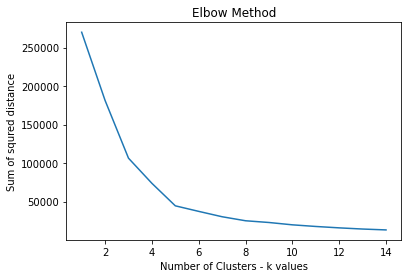

In [37]:
plt.plot(clusters, wcss)
plt.xlabel('Number of Clusters - k values')
plt.ylabel('Sum of squred distance')
plt.title('Elbow Method')

In [38]:
# after tuning
kmeans = cluster.KMeans(n_clusters=5)
pred = kmeans.fit_predict(df[['income', 'score']])
pred

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
df['clusters_num'] = pred

In [40]:
df.head()

,Genre,Age,income,score,cluster_num,clusters_num
0,Male,19,15,39,3,4
1,Male,21,15,81,4,1
2,Female,20,16,6,3,4
3,Female,23,16,77,4,1
4,Female,31,17,40,3,4


In [44]:
center = kmeans.cluster_centers_
center

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

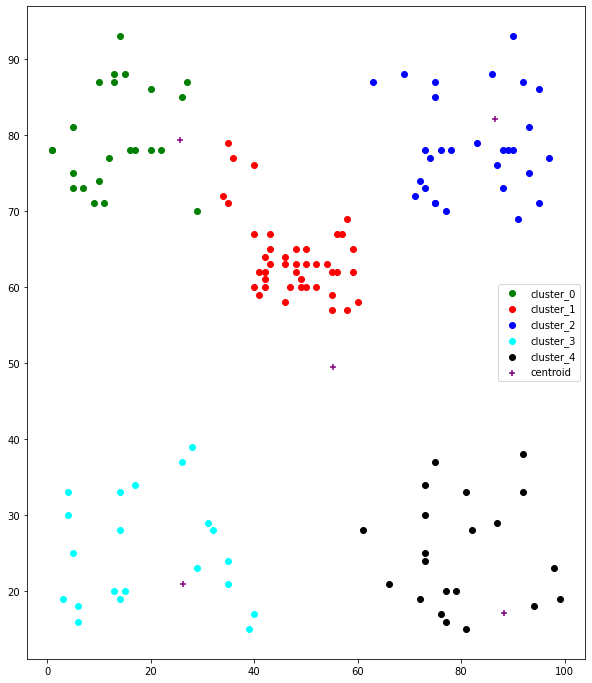

In [46]:
# Data vizualisation
cl0 = df[df.cluster_num == 0]
cl1 = df[df.cluster_num == 1]
cl2 = df[df.cluster_num == 2]
cl3 = df[df.cluster_num == 3]
cl4 = df[df.cluster_num == 4]

plt.figure(figsize=(10,12))

plt.scatter(cl0['score'], cl0['income'], color='green', label='cluster_0')
plt.scatter(cl1['score'], cl1['income'], color='red', label='cluster_1')
plt.scatter(cl2['score'], cl2['income'], color='blue', label='cluster_2')
plt.scatter(cl3['score'], cl3['income'], color='cyan', label='cluster_3')
plt.scatter(cl4['score'], cl4['income'], color='black', label='cluster_4')

plt.scatter(center[:,0], center[:, 1], color='purple', marker='+', label='centroid')

plt.legend()


In [47]:
!pip install kneed

In [49]:
# for more exact cluster
from kneed import KneeLocator
kneedle = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [50]:
print('Optimal Number of Clusters = ', kneedle.knee)

Optimal Number of Clusters =  5
